In [37]:
!pip install -q langchain_google_genai langchain_core langchain_community langgraph langsmith

In [38]:
from langchain_google_genai import ChatGoogleGenerativeAI

from google.colab import userdata
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
llm = ChatGoogleGenerativeAI(
    model="gemini-1.5-flash",
    api_key=GOOGLE_API_KEY,
    temperature=0
)


In [39]:
result  = llm.invoke("Difference betwen langgraph and crewai?")
print(result)

content="LangChain and CrewAI are both platforms that leverage large language models (LLMs), but they cater to different needs and have distinct approaches:\n\n**LangChain:**\n\n* **Focus:**  Building applications *with* LLMs.  It's a framework for developing applications that incorporate LLMs as a core component.  Think of it as a toolbox for connecting LLMs to other data sources and functionalities.\n* **Functionality:** Provides modular components for connecting LLMs to various data sources (databases, APIs, files), managing chains of prompts and actions, and memory management for maintaining context across interactions.  It emphasizes building complex, multi-step applications.\n* **Abstraction Level:** Lower-level. You have more control over the individual components and how they interact.  Requires more coding and understanding of the underlying architecture.\n* **Use Cases:** Building custom LLM-powered applications, integrating LLMs into existing workflows, creating complex conv

In [40]:
# humanmessage way of talking with chatmodel

from langchain_core.messages import AIMessage
ai_message : AIMessage = llm.invoke("hi")

In [41]:
print(ai_message.content)

Hi there! How can I help you today?


In [42]:
from typing_extensions import TypedDict

class firstllmagent(TypedDict):
  prompt:str
  output:str

In [43]:

def node1(state: firstllmagent):
  print('node1',state)
  prompt = state['prompt']
  ai_message:AIMessage = llm.invoke(prompt)
  return {'output':ai_message.content}



In [44]:
node1(firstllmagent(prompt='hi how are you?'))

node1 {'prompt': 'hi how are you?'}


{'output': 'I am doing well, thank you for asking!  How are you today?'}

#langgraph

In [45]:
#graph
from IPython.display import Image, display
from langgraph.graph.state import CompiledGraph
from langgraph.graph import START,END,StateGraph

builder:StateGraph = StateGraph(state_schema=firstllmagent)


In [46]:
#node
builder.add_node('LLM_call',node1)


In [47]:
#edges

builder.add_edge(START,'LLM_call')
builder.add_edge('LLM_call',END)

In [48]:
#graph compile
graph:CompiledGraph = builder.compile()

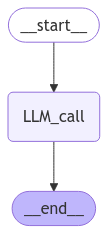

In [49]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [51]:
respose = graph.invoke({"prompt":"motive me to learn crewai"})
print(respose)

node1 {'prompt': 'motive me to learn crewai'}
{'prompt': 'motive me to learn crewai', 'output': "Let's talk about why you should learn CrewAI.  Forget generic motivational platitudes; let's get specific and tailor this to *your* potential gains:\n\n**Imagine this:**\n\n* **Scenario 1: You're a developer.**  CrewAI isn't just another tool; it's a potential game-changer.  Imagine streamlining your workflow, automating tedious tasks, and focusing your energy on the truly creative and challenging aspects of your projects.  Learning CrewAI means becoming more efficient, more valuable to your team, and potentially commanding higher compensation.  It's a skill that directly translates to increased productivity and career advancement.  Think less debugging, more innovation.\n\n* **Scenario 2: You're a business owner/entrepreneur.**  CrewAI offers the potential to automate processes, improve customer service, and gain valuable insights from your data.  This translates to cost savings, increased